<a href="https://colab.research.google.com/github/MSR806/DL/blob/master/DL_FFNetworkWithPyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss, mean_squared_error
from tqdm import tqdm_notebook
import seaborn as sns
import time
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

import torch

In [2]:
torch.manual_seed(0)

In [3]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['red', 'yellow', 'blue', 'black'])

#**Import Dataset**

In [4]:
data, lables = make_blobs(n_samples=1000, n_features=2, centers=4, random_state=0)
print(data.shape, lables.shape)

(1000, 2) (1000,)


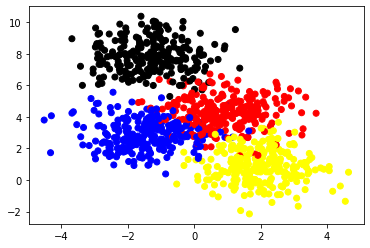

In [5]:
plt.scatter(data[:, 0], data[:, 1], c= lables, cmap= my_cmap)
plt.show()  

In [6]:
X_train, X_val, Y_train, Y_val = train_test_split(data, lables, stratify=lables, random_state= 0)
print(X_train.shape, Y_train.shape, data.shape, lables.shape)

(750, 2) (750,) (1000, 2) (1000,)


#**Using Torch Tensors and Autograd**

In [7]:
X_train, X_val, Y_train, Y_val = map(torch.tensor, (X_train, X_val, Y_train, Y_val))

In [8]:
print(X_train.shape, X_val.shape, Y_train.shape, Y_val.shape)

torch.Size([750, 2]) torch.Size([250, 2]) torch.Size([750]) torch.Size([250])


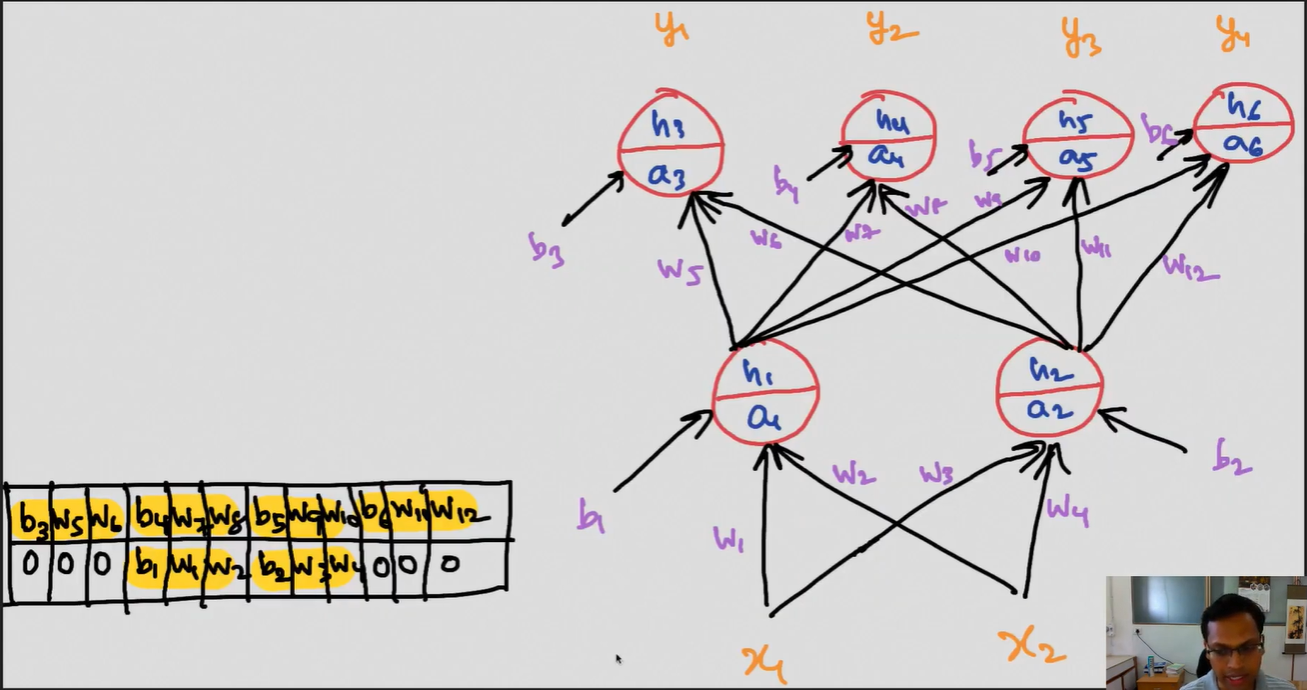

In [9]:
def model(x):
  a1 = torch.matmul(x, weights1) + bias1      # (N,2)x(2,2) --> (N,2)
  h1 = torch.sigmoid(a1)                        # (N,2)
  a2 = torch.matmul(h1, weights2) + bias2       # (N,2)x(2,4) --> (N,4)
  h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1)  # (N,4)
  return h2

In [10]:
def loss_fn(y_hat, y):
  return (-y_hat[range(y.shape[0]), y].log()).mean()

In [11]:
def accuracy(y_hat, y):
  pred = torch.argmax(y_hat, dim=-1)
  return (pred == y).float().mean()

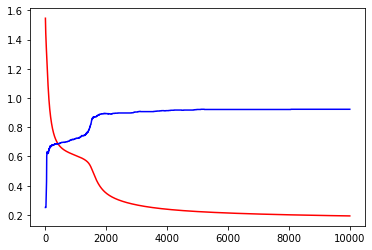

Loss before training:  1.5456441640853882
Loss after training:  0.19288592040538788


In [12]:
torch.manual_seed(0)
weights1 = torch.randn(2, 2) / math.sqrt(2)
weights1.requires_grad_()
bias1 = torch.zeros(2, requires_grad=True)

weights2 = torch.randn(2,4) / math.sqrt(2)
weights2.requires_grad_()
bias2 = torch.zeros(4, requires_grad=True)

learning_rate = 0.2
epochs = 10000

X_train = X_train.float()
Y_train = Y_train.long()

loss_arr = []
acc_arr = []

for i in range(epochs):
  y_hat = model(X_train)
  loss = loss_fn(y_hat, Y_train)
  loss.backward()
  loss_arr.append(loss.item())
  acc_arr.append(accuracy(y_hat, Y_train))

  with torch.no_grad():
    weights1 -= weights1.grad*learning_rate
    bias1 -= bias1.grad * learning_rate
    weights2 -= weights2.grad*learning_rate
    bias2 -= bias2.grad * learning_rate

    weights1.grad.zero_()
    bias1.grad.zero_()
    weights2.grad.zero_()
    bias2.grad.zero_()

plt.plot(loss_arr, 'r-')
plt.plot(acc_arr, 'b-')
plt.show()
print("Loss before training: ", loss_arr[0])
print("Loss after training: ", loss_arr[-1])

#**Using NN.Functional**

In [13]:
import torch.nn.functional as F

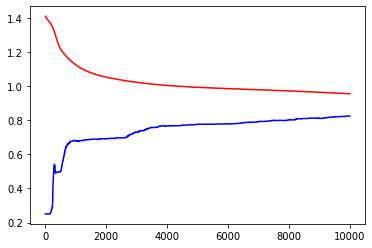

Loss before training:  1.4111980199813843
Loss after training:  0.9561843276023865


In [14]:
torch.manual_seed(0)
weights1 = torch.randn(2, 2) / math.sqrt(2)
weights1.requires_grad_()
bias1 = torch.zeros(2, requires_grad=True)

weights2 = torch.randn(2,4) / math.sqrt(2)
weights2.requires_grad_()
bias2 = torch.zeros(4, requires_grad=True)

learning_rate = 0.2
epochs = 10000

X_train = X_train.float()
Y_train = Y_train.long()

loss_arr = []
acc_arr = []

for i in range(epochs):
  y_hat = model(X_train)
  loss = F.cross_entropy(y_hat, Y_train) ##########
  loss.backward()
  loss_arr.append(loss.item())
  acc_arr.append(accuracy(y_hat, Y_train))

  with torch.no_grad():
    weights1 -= weights1.grad*learning_rate
    bias1 -= bias1.grad * learning_rate
    weights2 -= weights2.grad*learning_rate
    bias2 -= bias2.grad * learning_rate

    weights1.grad.zero_()
    bias1.grad.zero_()
    weights2.grad.zero_()
    bias2.grad.zero_()

plt.plot(loss_arr, 'r-')
plt.plot(acc_arr, 'b-')
plt.show()
print("Loss before training: ", loss_arr[0])
print("Loss after training: ", loss_arr[-1])

#**Using NN.Parameter**

In [15]:
import torch.nn as nn

In [29]:
class FirstNetwork(nn.Module):
  
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.weights1 = nn.Parameter(torch.randn(2, 2) / math.sqrt(2))
    self.bias1 = nn.Parameter(torch.zeros(2))
    self.weights2 = nn.Parameter(torch.randn(2,4) / math.sqrt(2))
    self.bias2 = nn.Parameter(torch.zeros(4))

  def forward(self, X):
    a1 = torch.matmul(X, self.weights1) + bias1
    h1 = a1.sigmoid()
    a2 = torch.matmul(h1, self.weights2) + bias2
    h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1)
    return h2


In [37]:
def fit(epochs = 1000, learning_rate = 1):
  loss_arr = []
  acc_arr = []

  for i in range(epochs):
    y_hat = fn.forward(X_train)
    loss = F.cross_entropy(y_hat, Y_train)
    loss.backward()
    loss_arr.append(loss.item())
    acc_arr.append(accuracy(y_hat, Y_train))

    with torch.no_grad():
      for param in fn.parameters():
        param -= learning_rate * param.grad
      fn.zero_grad()

  plt.plot(loss_arr, 'r-')
  plt.plot(acc_arr, 'b-')
  plt.show()
  print("Loss before training: ", loss_arr[0])
  print("Loss after training: ", loss_arr[-1])


In [ ]:
fn = FirstNetwork()
fit()

#**Using NN.linear and Optim**

In [39]:
class FirstNetwork_v1(nn.Module):
  
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.lin1 = nn.Linear(2,2)
    self.lin2 = nn.Linear(2,4)

  def forward(self, X):
    a1 = self.lin1(X)
    h1 = a1.sigmoid()
    a2 = self.lin2(h1)
    h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1)
    return h2

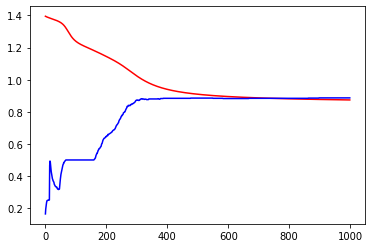

Loss before training:  1.395160436630249
Loss after training:  0.8738409876823425


In [40]:
fn = FirstNetwork_v1()
fit()

In [41]:
from torch import optim

In [42]:
def fit_v1(epochs = 1000, learning_rate = 1):
  loss_arr = []
  acc_arr = []
  opt = optim.SGD(fn.parameters(), lr = learning_rate)

  for i in range(epochs):
    y_hat = fn.forward(X_train)
    loss = F.cross_entropy(y_hat, Y_train)
    loss_arr.append(loss.item())
    acc_arr.append(accuracy(y_hat, Y_train))

    loss.backward()
    opt.step()
    opt.zero_grad()
    
  plt.plot(loss_arr, 'r-')
  plt.plot(acc_arr, 'b-')
  plt.show()
  print("Loss before training: ", loss_arr[0])
  print("Loss after training: ", loss_arr[-1])


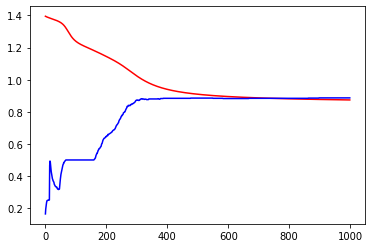

Loss before training:  1.395160436630249
Loss after training:  0.8738409876823425


In [43]:
fn = FirstNetwork_v1()
fit_v1()

#**Using NN.Sequential**

In [66]:
class FirstNetwork_v2(nn.Module):
  
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.net = nn.Sequential(
        nn.Linear(2,128),
        nn.Sigmoid(),
        nn.Linear(128,4),
        nn.Softmax()
    )

  def forward(self, X):
    return self.net(X)

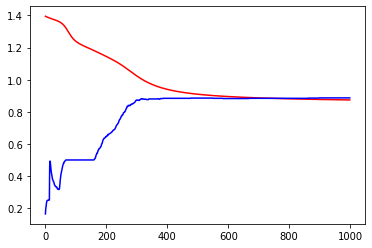

Loss before training:  1.395160436630249
Loss after training:  0.8738410472869873


In [48]:
fn = FirstNetwork_v2()
fit_v1()

In [54]:
def fit_v2(x, y, model, opt, loss_fn, epochs = 1000):
  
  for epoch in range(epochs):
    loss = loss_fn(model(x), y)

    loss.backward()
    opt.step()
    opt.zero_grad()
  return loss.item()

In [56]:
fn = FirstNetwork_v2()
loss_fn = F.cross_entropy
opt = optim.SGD(fn.parameters(), lr = 1)
fit_v2(X_train, Y_train, fn, opt, loss_fn)

0.8738410472869873

#**Migrating it to CUDA**

In [67]:
device = torch.device('cpu')

X_train = X_train.to(device)
Y_train = Y_train.to(device)
fn = FirstNetwork_v2()
fn.to(device)
tic = time.time()
print('Final loss', fit_v2(X_train, Y_train, fn, opt, loss_fn))
toc = time.time()
print("Time taken ", toc-tic)

Final loss 1.3985880613327026
Time taken  1.3070003986358643


In [68]:
device = torch.device('cuda')

X_train = X_train.to(device)
Y_train = Y_train.to(device)
fn = FirstNetwork_v2()
fn.to(device)
tic = time.time()
print('Final loss', fit_v2(X_train, Y_train, fn, opt, loss_fn))
toc = time.time()
print("Time taken ", toc-tic)

Final loss 1.398587942123413
Time taken  0.780228853225708
